In [1]:
from neutrino_weighter_new_PISA import GENIENeutrinoWeighter
from neutrino_weighter_new_PISA import GENIENeutrinoWeighter_Backup
import matplotlib.pyplot as plt
import numpy as np

<< PISA is running in double precision (FP64) mode; numba is running on CPU (single core) >>


In [2]:
prob = GENIENeutrinoWeighter_Backup(neutrino_decay=True)

In [3]:
fluxweights = GENIENeutrinoWeighter()
def getfluxnumus(trueenergy,truecoszen,weightedaeff):
    #numu
    weightsnumu=fluxweights(trueenergy,truecoszen,1,weightedaeff)[1]
    #numubar
    weightsnumubar=fluxweights(trueenergy,truecoszen,-1,weightedaeff)[1]
    return np.array([weightsnumu,weightsnumubar])

In [4]:
fluxweights1 = GENIENeutrinoWeighter_Backup()
def getfluxnumus1(trueenergy,truecoszen,weightedaeff):
    #numu
    weightsnumu=fluxweights1(trueenergy,truecoszen,1,1,weightedaeff)
    #numubar
    weightsnumubar=fluxweights1(trueenergy,truecoszen,1,-1,weightedaeff)
    return np.array([weightsnumu,weightsnumubar])

In [5]:
trueE=np.geomspace(1,1e4,10001)
trueCT=np.linspace(-1,1,10001)
weights=np.ones(10001)
test1=getfluxnumus1(trueE,trueCT,weights)


Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculating oscillation probabilities...
Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculating oscillation probabilities...


Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux


Text(0, 0.5, 'weights')

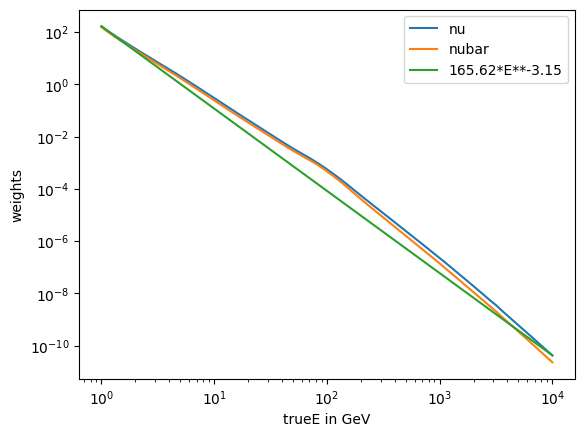

In [6]:
trueE=np.geomspace(1,1e4,10001)
trueCT=np.linspace(-1,1,10001)
weights=np.ones(10001)
test=getfluxnumus(trueE,trueCT,weights)

plt.plot(trueE,test[0],label='nu')
plt.plot(trueE,test[1],label='nubar')
plt.plot(trueE,test[0][0]*trueE**-3.147094979225951,label='%.2f*E**%.2f' %(test[0][0],-3.147094979225951))
plt.legend()
plt.loglog()
plt.xlabel('trueE in GeV')
plt.ylabel('weights')

In [7]:
r=test1[0]/test[0]
def _(start,stop):
    return np.mean(r[(trueE<stop)*(trueE>start)])
_(3,30),_(30,100),_(100,1000)

(0.48229751363649886, 0.9749710596448997, 0.9999826206011861)

Text(0, 0.5, 'weights')

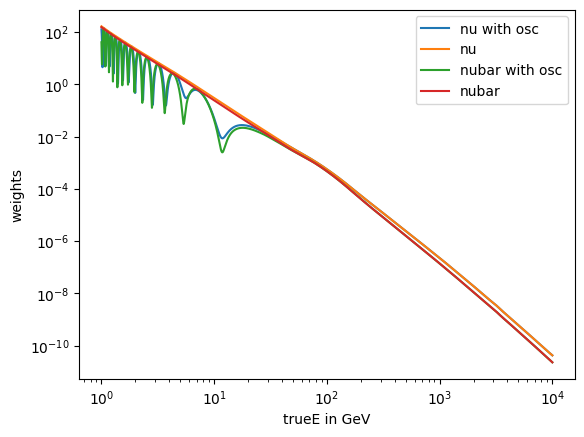

In [8]:
plt.plot(trueE,test1[0],label='nu with osc')
plt.plot(trueE,test[0],label='nu')
plt.plot(trueE,test1[1],label='nubar with osc')
plt.plot(trueE,test[1],label='nubar')
plt.legend()
plt.loglog()
plt.xlabel('trueE in GeV')
plt.ylabel('weights')

Text(0, 0.5, 'weights')

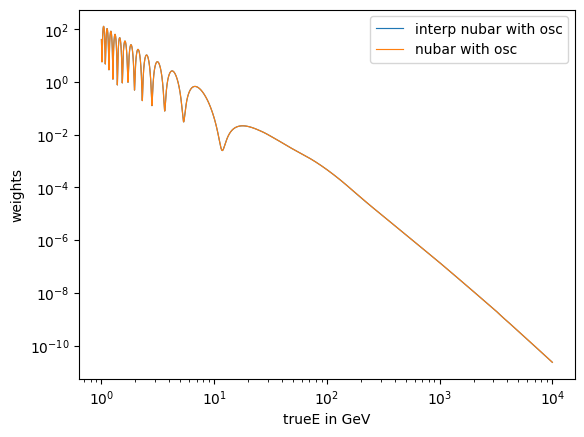

In [9]:
b=np.interp(np.geomspace(1,1e4,100001),trueE,test1[1])
plt.plot(np.geomspace(1,1e4,100001),b,label='interp nubar with osc',lw=0.84)
plt.plot(trueE,test1[1],label='nubar with osc',lw=0.84)
plt.legend()
plt.loglog()
plt.xlabel('trueE in GeV')
plt.ylabel('weights')

In [10]:
def set_oscpar(nuflag, MOflag):    
    if MOflag:
        prob.osc_params.theta12 = 33.41 * np.pi / 180    #  Set th12 in radians
        prob.osc_params.theta13 = 8.54 * np.pi / 180     #  Set th13 in radians
        prob.osc_params.theta23 = 47.5047 * np.pi / 180     #  Set th23 in radians
        prob.osc_params.dm21 = 7.41e-5                   #  Set dm21 in eV^2   
        prob.osc_params.dm31 = 2.47467e-3                  #  Set dm31 in eV^2  
        prob.osc_params.deltacp = 0 * np.pi / 180      #  Set deltaCP in radians 
    else :
        prob.osc_params.theta12 = 33.41 * np.pi / 180    #  Set th12 in radians
        prob.osc_params.theta13 = 8.54 * np.pi / 180     #  Set th13 in radians
        prob.osc_params.theta23 = 47.5047 * np.pi / 180     #  Set th23 in radians
        prob.osc_params.dm21 = 7.41e-5                   #  Set dm21 in eV^2   
        prob.osc_params.dm31 = -2.47467e-3 +  7.41e-5                   #  Set dm31 in eV^2  
        prob.osc_params.deltacp = 0 * np.pi / 180      #  Set deltaCP in radians 

    #if (prob.decay_flag == 1):
        #prob.decay_params.decay_alpha3 = 0

In [11]:
def Prob_cal_yx(nuflag, alpha3):

    prob.decay_params.decay_alpha3 = alpha3
    
    En_list = np.logspace(np.log10(1), np.log10(100), 500+1)
    CT_list = np.linspace(-1, 0, 100+1)

    En_full_list = []
    CT_full_list = []

    for En in En_list:
        for CT in CT_list:
            En_full_list.append(En)
            CT_full_list.append(CT)

    flav = 1
    if nuflag :
        nubar = 1
    else:
        nubar = -1
    weighted_aeff = 1
    P = prob(En_full_list, CT_full_list, flav, nubar, weighted_aeff)
    Puu_PISA =  P[:,1,1]
    Peu_PISA =  P[:,0,1]
    Pue_PISA =  P[:,1,0]
    Pee_PISA =  P[:,0,0]


    Nx = len(En_list)
    Ny = len(CT_list)
    En_full_list_mesh = np.reshape(En_full_list, (Nx, Ny))
    CT_full_list_mesh = np.reshape(CT_full_list, (Nx, Ny))
    Puu_PISA_list_mesh = np.reshape(Puu_PISA, (Nx, Ny))
    Peu_PISA_list_mesh = np.reshape(Peu_PISA, (Nx, Ny))
    Pue_PISA_list_mesh = np.reshape(Pue_PISA, (Nx, Ny))
    Pee_PISA_list_mesh = np.reshape(Pee_PISA, (Nx, Ny))
    
    Prob_PISA_list_mesh = [
        Puu_PISA_list_mesh, 
        Peu_PISA_list_mesh,
        Pue_PISA_list_mesh,
        Pee_PISA_list_mesh
    ]
    
    if nuflag:
        Prob_name = [
            r'$P(\nu_\mu \rightarrow \nu_\mu)$',
            r'$P(\nu_e \rightarrow \nu_\mu)$',
            r'$P(\nu_\mu \rightarrow \nu_e)$',
            r'$P(\nu_e \rightarrow \nu_e)$'
        ]
    else:
        Prob_name = [
            r'$P(\bar{\nu}_\mu \rightarrow \bar{\nu}_\mu)$',
            r'$P(\bar{\nu}_e \rightarrow \bar{\nu}_\mu)$',
            r'$P(\bar{\nu}_\mu \rightarrow \bar{\nu}_e)$',
            r'$P(\bar{\nu}_e \rightarrow \bar{\nu}_e)$'
        ]
    
    return En_full_list_mesh, CT_full_list_mesh, Prob_PISA_list_mesh, Prob_name

In [12]:
set_oscpar(nuflag=True, MOflag=True)
En_full_list_mesh, CT_full_list_mesh, Prob_SI, Prob_name = Prob_cal_yx(nuflag=True, alpha3 = 0)
En_full_list_mesh, CT_full_list_mesh, Prob_decay, Prob_name = Prob_cal_yx(nuflag=True, alpha3 = 1e-4)
Prob_diff = np.array(Prob_decay) - np.array(Prob_SI)

Prob_all = [Prob_SI, Prob_decay, Prob_diff]

Calculating nominal nue flux
Calculating nominal numu flux
Calculating nominal nuebar flux
Calculating nominal numubar flux
Calculating oscillation probabilities...


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

In [ ]:
vmins = [
    [0, 0, -0.8],
    [0, 0, -0.3],
    [0, 0, -0.3],
    [0, 0, -0.5]
]

vmaxs = [
    [1, 1, 0.8],
    [0.6, 0.6, 0.3],
    [0.6, 0.6, 0.3],
    [1, 1, 0.8]
]

for ichannel in range(len(Prob_name)):
    cmaps = ['Spectral_r', 'Spectral_r', 'RdBu_r']
    titles = [
        Prob_name[ichannel] + r' [$\alpha_3 = 0$], NO',
        Prob_name[ichannel] + r' [$\alpha_3 = 1 \times 10^{-4}~{\rm eV}^2$], NO',
        Prob_name[ichannel] + r' [$\alpha_3 = 1 \times 10^{-4}~{\rm eV}^2$] - ' + Prob_name[ichannel] + r' [$\alpha_3 = 0$], NO'
    ]

    fig, axes = plt.subplots(1,3, figsize=(18, 4),facecolor ='w')

    for i in range(len(axes)):
        countourf_ = axes[i].contourf(En_full_list_mesh, CT_full_list_mesh, Prob_all[i][ichannel], 100, cmap = cmaps[i],
            vmin=vmins[ichannel][i], vmax=vmaxs[ichannel][i])

        # Set axes label
        axes[i].set_title(titles[i])
        axes[i].set_ylabel(r'$\cos\theta$')
        axes[i].set_xlabel(r'$E_{\nu}~[GeV]$')
        axes[i].set_xscale('log')
        plt.xlim([1, 100])
        cbar = fig.colorbar(countourf_)

    plt.show()

In [ ]:
nuflag=False
MOflag=True
set_oscpar(nuflag, MOflag)
En_full_list_mesh, CT_full_list_mesh, Prob_SI, Prob_name = Prob_cal_yx(nuflag, alpha3 = 0)
En_full_list_mesh, CT_full_list_mesh, Prob_decay, Prob_name = Prob_cal_yx(nuflag, alpha3 = 1e-4)
Prob_diff = np.array(Prob_decay) - np.array(Prob_SI)

Prob_all = [Prob_SI, Prob_decay, Prob_diff]

In [ ]:
vmins = [
    [0, 0, -0.8],
    [0, 0, -0.3],
    [0, 0, -0.3],
    [0, 0, -0.5]
]

vmaxs = [
    [1, 1, 0.8],
    [0.6, 0.6, 0.3],
    [0.6, 0.6, 0.3],
    [1, 1, 0.8]
]

for ichannel in range(len(Prob_name)):
    cmaps = ['Spectral_r', 'Spectral_r', 'RdBu_r']
    titles = [
        Prob_name[ichannel] + r' [$\alpha_3 = 0$], NO',
        Prob_name[ichannel] + r' [$\alpha_3 = 1 \times 10^{-4}~{\rm eV}^2$], NO',
        Prob_name[ichannel] + r' [$\alpha_3 = 1 \times 10^{-4}~{\rm eV}^2$] - ' + Prob_name[ichannel] + r' [$\alpha_3 = 0$], NO'
    ]

    fig, axes = plt.subplots(1,3, figsize=(18, 4),facecolor ='w')

    for i in range(len(axes)):
        countourf_ = axes[i].contourf(En_full_list_mesh, CT_full_list_mesh, Prob_all[i][ichannel], 100, cmap = cmaps[i],
            vmin=vmins[ichannel][i], vmax=vmaxs[ichannel][i])

        # Set axes label
        axes[i].set_title(titles[i])
        axes[i].set_ylabel(r'$\cos\theta$')
        axes[i].set_xlabel(r'$E_{\nu}~[GeV]$')
        axes[i].set_xscale('log')
        plt.xlim([1, 100])
        cbar = fig.colorbar(countourf_)

    plt.show()

In [ ]:
set_oscpar(nuflag=True, MOflag=False)
En_full_list_mesh, CT_full_list_mesh, Prob_SI, Prob_name = Prob_cal_yx(nuflag=True, alpha3 = 0)
En_full_list_mesh, CT_full_list_mesh, Prob_decay, Prob_name = Prob_cal_yx(nuflag=True, alpha3 = 1e-4)
Prob_diff = np.array(Prob_decay) - np.array(Prob_SI)

Prob_all = [Prob_SI, Prob_decay, Prob_diff]

In [ ]:
vmins = [
    [0, 0, -0.8],
    [0, 0, -0.3],
    [0, 0, -0.3],
    [0, 0, -0.5]
]

vmaxs = [
    [1, 1, 0.8],
    [0.6, 0.6, 0.3],
    [0.6, 0.6, 0.3],
    [1, 1, 0.8]
]

for ichannel in range(len(Prob_name)):
    cmaps = ['Spectral_r', 'Spectral_r', 'RdBu_r']
    titles = [
        Prob_name[ichannel] + r' [$\alpha_3 = 0$], IO',
        Prob_name[ichannel] + r' [$\alpha_3 = 1 \times 10^{-4}~{\rm eV}^2$], IO',
        Prob_name[ichannel] + r' [$\alpha_3 = 1 \times 10^{-4}~{\rm eV}^2$] - ' + Prob_name[ichannel] + r' [$\alpha_3 = 0$], IO'
    ]

    fig, axes = plt.subplots(1,3, figsize=(18, 4),facecolor ='w')

    for i in range(len(axes)):
        countourf_ = axes[i].contourf(En_full_list_mesh, CT_full_list_mesh, Prob_all[i][ichannel], 100, cmap = cmaps[i],
            vmin=vmins[ichannel][i], vmax=vmaxs[ichannel][i])

        # Set axes label
        axes[i].set_title(titles[i])
        axes[i].set_ylabel(r'$\cos\theta$')
        axes[i].set_xlabel(r'$E_{\nu}~[GeV]$')
        axes[i].set_xscale('log')
        plt.xlim([1, 100])
        cbar = fig.colorbar(countourf_)

    plt.show()

# Extra

In [ ]:
cmaps = ['Spectral_r', 'Spectral_r', 'RdBu_r']
vmins = [0, 0, -0.8]
vmaxs = [1, 1, 0.8]
titles = [
    r'$P(\nu_\mu \rightarrow \nu_\mu)$ [$\alpha_3 = 0$]',
    r'$P(\nu_\mu \rightarrow \nu_\mu)$ [$\alpha_3 = 1 \times 10^{-4}~{\rm eV}^2$]',
    r'$P(\nu_\mu \rightarrow \nu_\mu)$ [$\alpha_3 = 1 \times 10^{-4}~{\rm eV}^2$] - $P(\nu_\mu \rightarrow \nu_\mu)$ [$\alpha_3 = 0$]'  
]

fig, axes = plt.subplots(1,3, figsize=(18, 4),facecolor ='w')

for i in range(len(axes)):
    countourf_ = axes[i].contourf(En_full_list_mesh, CT_full_list_mesh, Prob_all[i][0], 20, cmap = cmaps[i],
        vmin=vmins[i], vmax=vmaxs[i])
    # Set axes label
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(r'$\cos\theta$')
    axes[i].set_ylabel(r'$E_{\nu}~[GeV]$')
    axes[i].set_xscale('log')
    plt.xlim([1, 100])
    cbar = fig.colorbar(countourf_)

plt.show()

In [ ]:
cmaps = ['Spectral_r', 'Spectral_r', 'RdBu_r']
vmins = [0, 0, -0.3]
vmaxs = [0.6, 0.6, 0.3]
titles = [
    r'$P(\nu_e \rightarrow \nu_\mu)$ [SI]',
    r'$P(\nu_e \rightarrow \nu_\mu)$ [SI + Decay]',
    r'$P(\nu_e \rightarrow \nu_\mu)$ [SI + Decay] - $P(\nu_e \rightarrow \nu_\mu)$ [SI]'  
]

fig, axes = plt.subplots(1,3, figsize=(18, 4),facecolor ='w')

for i in range(len(axes)):
    countourf_ = axes[i].contourf(En_full_list_mesh, CT_full_list_mesh, Prob_all[i][1], 20, cmap = cmaps[i],
        vmin=vmins[i], vmax=vmaxs[i])

    # Set axes label
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(r'$\cos\theta$')
    axes[i].set_ylabel(r'$E_{\nu}~[GeV]$')
    axes[i].set_xscale('log')
    plt.xlim([1, 100])
    cbar = fig.colorbar(countourf_)

plt.show()

In [ ]:
cmaps = ['Spectral_r', 'Spectral_r', 'RdBu_r']
vmins = [0, 0, -0.3]
vmaxs = [0.6, 0.6, 0.3]
titles = [
    r'$P(\nu_\mu \rightarrow \nu_e)$ [SI]',
    r'$P(\nu_\mu \rightarrow \nu_e)$ [SI + Decay]',
    r'$P(\nu_\mu \rightarrow \nu_e)$ [SI + Decay] - $P(\nu_\mu \rightarrow \nu_e)$ [SI]'  
]

fig, axes = plt.subplots(1,3, figsize=(18, 4),facecolor ='w')

for i in range(len(axes)):
    countourf_ = axes[i].contourf(En_full_list_mesh, CT_full_list_mesh, Prob_all[i][2], 20, cmap = cmaps[i],
        vmin=vmins[i], vmax=vmaxs[i])

    # Set axes label
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(r'$\cos\theta$')
    axes[i].set_ylabel(r'$E_{\nu}~[GeV]$')
    axes[i].set_xscale('log')
    plt.xlim([1, 100])
    cbar = fig.colorbar(countourf_)

plt.show()

In [ ]:
cmaps = ['Spectral_r', 'Spectral_r', 'RdBu_r']
vmins = [0, 0, -0.5]
vmaxs = [1, 1, 0.5]
titles = [
    r'$P(\nu_e \rightarrow \nu_e)$ [SI]',
    r'$P(\nu_e \rightarrow \nu_e)$ [SI + Decay]',
    r'$P(\nu_e \rightarrow \nu_e)$ [SI + Decay] - $P(\nu_e \rightarrow \nu_e)$ [SI]'  
]

fig, axes = plt.subplots(1,3, figsize=(18, 4),facecolor ='w')

for i in range(len(axes)):
    countourf_ = axes[i].contourf(En_full_list_mesh, CT_full_list_mesh, Prob_all[i][3], 20, cmap = cmaps[i],
        vmin=vmins[i], vmax=vmaxs[i])

    # Set axes label
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(r'$\cos\theta$')
    axes[i].set_ylabel(r'$E_{\nu}~[GeV]$')
    axes[i].set_xscale('log')
    plt.xlim([1, 100])
    cbar = fig.colorbar(countourf_)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6),facecolor ='w')

countourf_ = ax.contourf(En_full_list_mesh, CT_full_list_mesh, Prob_SI[0], 20, cmap = 'Spectral_r', vmin=0, vmax=1)

# Set axes label
ax.set_title(r'$P(\nu_\mu \rightarrow \nu_\mu)$')
ax.set_xlabel(r'$\cos\theta$', labelpad=20)
ax.set_ylabel(r'$E_{\nu}~[GeV]$', labelpad=20)
ax.set_xscale('log')
plt.xlim([1, 100])
cbar = fig.colorbar(countourf_)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6),facecolor ='w')

countourf_ = ax.contourf(En_full_list_mesh, CT_full_list_mesh, Prob_decay[0], 20, cmap = 'Spectral_r', vmin=0, vmax=1)

# Set axes label
ax.set_title(r'$P(\nu_\mu \rightarrow \nu_\mu)$')
ax.set_xlabel(r'$\cos\theta$', labelpad=20)
ax.set_ylabel(r'$E_{\nu}~[GeV]$', labelpad=20)
ax.set_xscale('log')
plt.xlim([1, 100])
cbar = fig.colorbar(countourf_)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6),facecolor ='w')

countourf_ = ax.contourf(En_full_list_mesh, CT_full_list_mesh, Prob_diff[0], 20, cmap = 'RdBu_r', vmin=-0.8, vmax=0.8)

# Set axes label
ax.set_title(r'$P(\nu_\mu \rightarrow \nu_\mu)$')
ax.set_xlabel(r'$\cos\theta$', labelpad=20)
ax.set_ylabel(r'$E_{\nu}~[GeV]$', labelpad=20)
ax.set_xscale('log')
plt.xlim([1, 100])
cbar = fig.colorbar(countourf_)

plt.show()